<a href="https://colab.research.google.com/github/np03cs4a240070-oss/worksheetsAI-umikapoudel/blob/main/worksheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

print("All required libraries imported successfully.")

All required libraries imported successfully.


In [2]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nAnswers to questions 1–4:")
print("1. Samples and features:", X.shape[0], "samples,", X.shape[1], "features")
print("\n2. Class distribution:")
print(pd.Series(y).value_counts().sort_index())
print("\n3. Missing values:", "No" if df.isnull().sum().sum() == 0 else "Yes")
print("\n4. Class names:", list(class_names))

Dataset shape: (178, 14)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilu

In [3]:
# Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape: ", X_test_scaled.shape)
print("\nScaler mean (first 5): ", scaler.mean_[:5])
print("Scaler scale (first 5):", scaler.scale_[:5])

print("\nAnswers to questions 5–8:")
print("5. Why split before scaling? → Prevent data leakage (test set must remain unseen)")
print("6. Why fit scaler only on train? → Simulate real-world: test data is future/unseen")
print("7. Purpose of random_state? → Reproducible splits every time you run the code")
print("8. What do mean & scale represent? → mean = training column averages, scale = training column std devs")

Training set shape: (142, 13)
Testing set shape:  (36, 13)

Scaler mean (first 5):  [12.97147887  2.34        2.36485915 19.62535211 99.63380282]
Scaler scale (first 5): [ 0.79969003  1.09740026  0.26743365  3.36892252 14.88475866]

Answers to questions 5–8:
5. Why split before scaling? → Prevent data leakage (test set must remain unseen)
6. Why fit scaler only on train? → Simulate real-world: test data is future/unseen
7. Purpose of random_state? → Reproducible splits every time you run the code
8. What do mean & scale represent? → mean = training column averages, scale = training column std devs


In [4]:
# Configure and instantiate MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

print("Model architecture:    ", mlp.hidden_layer_sizes)
print("Activation function:   ", mlp.activation)
print("Solver:                ", mlp.solver)
print("Maximum iterations:    ", mlp.max_iter)

Model architecture:     (50, 25)
Activation function:    relu
Solver:                 adam
Maximum iterations:     500


In [5]:

# Part 2.2 – Train the Model

print("\nTraining the MLP classifier...")
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss:    {mlp.loss_:.4f}")
print(f"Training set accuracy:  {mlp.score(X_train_scaled, y_train):.4f}")

if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Did NOT converge – consider more iterations or smaller learning rate")
else:
    print("Model converged successfully.")

print("\nAnswers to questions 9–12:")
print("9. Loss value represents → cross-entropy loss (average prediction error)")
print(f"10. Training took {mlp.n_iter_} iterations")
print("11. Very high loss means → model not learning (underfitting, bad scaling, etc.)")
print(f"12. Training accuracy: {mlp.score(X_train_scaled, y_train):.4f}")


Training the MLP classifier...
Training completed in 48 iterations
Final training loss:    0.1739
Training set accuracy:  0.9859
Model converged successfully.

Answers to questions 9–12:
9. Loss value represents → cross-entropy loss (average prediction error)
10. Training took 48 iterations
11. Very high loss means → model not learning (underfitting, bad scaling, etc.)
12. Training accuracy: 0.9859


In [6]:

# Part 3.1 – Predictions & Basic Metrics

y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}  ({accuracy*100:.2f}%)")
print(f"Correct predictions: {sum(y_pred == y_test)} / {len(y_test)}")

Test Accuracy: 1.0000  (100.00%)
Correct predictions: 36 / 36



Classification Report:
              precision    recall  f1-score   support

     class_0     1.0000    1.0000    1.0000        12
     class_1     1.0000    1.0000    1.0000        14
     class_2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



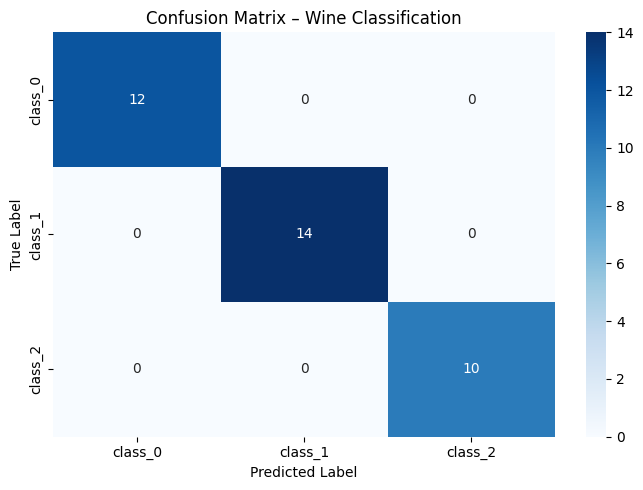

Weighted Precision: 1.0000
Weighted Recall:    1.0000
Weighted F1-Score:  1.0000

Answers to questions 13–16:
13. Best worst performing class → check f1-score in report (often class_1 best)
14. Per-class precision/recall/f1 → see classification report above
15. Types of errors → look at off-diagonal values in confusion matrix
16. Class imbalance? → No strong imbalance (59, 71, 48) → not major issue


In [7]:
# Part 3.2 – Comprehensive Evaluation

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix – Wine Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall:    {recall:.4f}")
print(f"Weighted F1-Score:  {f1:.4f}")

print("\nAnswers to questions 13–16:")
print("13. Best worst performing class → check f1-score in report (often class_1 best)")
print("14. Per-class precision/recall/f1 → see classification report above")
print("15. Types of errors → look at off-diagonal values in confusion matrix")
print("16. Class imbalance? → No strong imbalance (59, 71, 48) → not major issue")